In [25]:
%matplotlib inline

import numpy as np
import pandas as pd
from os import path
import seaborn as sns
#sns.set()
import matplotlib.pyplot as plt

from colour import Color

In [8]:
filename = 'dataset_show.h5'
keyname = '20simpleHam_crafted1'
filepath = path.abspath(path.join(path.dirname("createfigures.ipynb"), "..", "..", f"main/data/{filename}"))
# Load a single chunk => much faster
import h5py
f = h5py.File(filepath, 'r')
print([key for key in f.keys()])
dataset = pd.read_hdf(filepath,keyname)

['20simpleHam_crafted1']


In [19]:
dataset

,dt,steps,stepsCont,delay,frequency,spectralwidth,aFieldStrength,b,c,ODscaler,dim,CoupledHamiltonian,spectrum,optdensity
0,1,4096,28672,2048,190,30,0.0100,0.0,0.0,5.0,20,"[[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...","[2.6112311253767376e-23, 2.6166444677374292e-2...","[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0...."
1,1,4096,28672,2048,190,30,0.0199,0.0,0.0,5.0,20,"[[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...","[3.7678349995160825e-22, 3.7763399643095033e-2...","[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0...."
2,1,4096,28672,2048,190,30,0.0298,0.0,0.0,5.0,20,"[[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...","[1.633455063328993e-21, 1.6378360748977934e-21...","[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0...."
3,1,4096,28672,2048,190,30,0.0397,0.0,0.0,5.0,20,"[[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...","[4.089346586219832e-21, 4.103596463468254e-21,...","[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0...."
4,1,4096,28672,2048,190,30,0.0496,0.0,0.0,5.0,20,"[[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...","[7.062618248985738e-21, 7.098888417010364e-21,...","[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,4096,28672,2048,190,30,0.9505,0.0,0.0,5.0,20,"[[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...","[1.982956879045522e-10, 1.9835301788983786e-10...","[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0...."
96,1,4096,28672,2048,190,30,0.9604,0.0,0.0,5.0,20,"[[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...","[2.583903380869745e-10, 2.5845405451555226e-10...","[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0...."
97,1,4096,28672,2048,190,30,0.9703,0.0,0.0,5.0,20,"[[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...","[3.319934158002442e-10, 3.320641412263353e-10,...","[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0...."
98,1,4096,28672,2048,190,30,0.9802,0.0,0.0,5.0,20,"[[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...","[4.212758684500532e-10, 4.213542766342644e-10,...","[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0...."


In [50]:
z = dataset["aFieldStrength"]
spectras = np.array(dataset["spectrum"].tolist())[:,500:2500]
x = np.arange(0,3276)[500:2500]
y = np.linspace(0.01,1,100)
X,Y = np.meshgrid(x,y)

print(X.shape,Y.shape,spectras.shape)

(100, 2000) (100, 2000) (100, 2000)


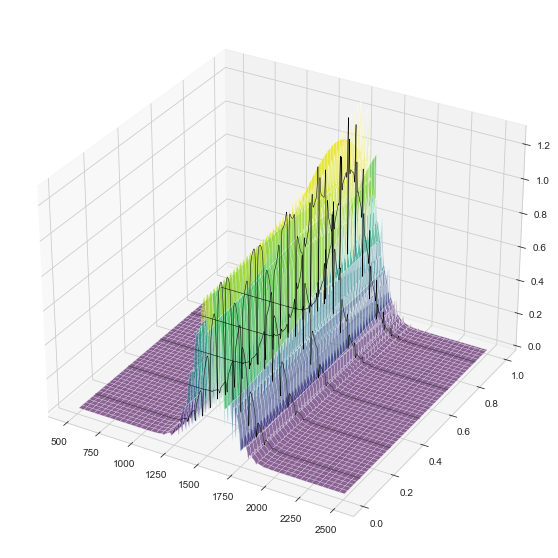

In [65]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
n = 5
strengths = np.arange(0,100,n)
for i in range(n):
    i = int((i+1/2)*100/n)
    ax.plot(X[i],Y[i],spectras[i], linewidth=0.5,color='black')
ax.plot_surface(X,Y,spectras,linewidth = 0.2,cmap = 'viridis' ,alpha = 0.6)

plt.show()

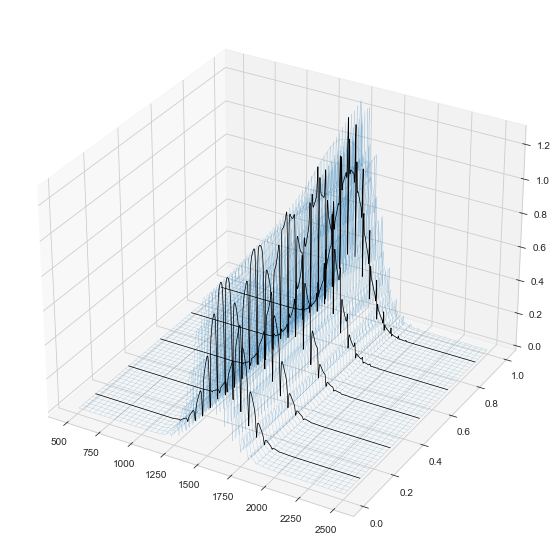

In [63]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
n = 5
strengths = np.arange(0,100,n)
for i in range(n):
    i = int((i+1/2)*100/n)
    ax.plot(X[i],Y[i],spectras[i], linewidth=0.7,color='black')
ax.plot_wireframe(X,Y,spectras,linewidth = 0.2,cmap = 'magma' ,alpha = 0.6)

plt.show()